In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
t = pd.read_excel('C:/Users/stefa/Desktop/Glob_regression.xlsx')
t

,Depth,Previous,Mag
0,0.0,0,8.3
1,0.0,0,7.1
2,0.0,0,6.6
3,0.0,0,7.8
4,0.0,0,7.8
...,...,...,...
363065,35.0,0,4.0
363066,48.4,0,4.5
363067,62.4,0,4.4
363068,10.0,0,5.2


In [3]:
train = t[:360000]
train
test = t[360000:]
test

,Depth,Previous,Mag
360000,35.0,0,4.1
360001,86.5,0,4.4
360002,46.0,0,4.5
360003,10.0,0,4.1
360004,36.5,0,4.1
...,...,...,...
363065,35.0,0,4.0
363066,48.4,0,4.5
363067,62.4,0,4.4
363068,10.0,0,5.2


In [4]:
X = train.iloc[:,0:2]
y = train.iloc[:,2]
test[['Depth','Previous']]
real = pd.DataFrame(test['Mag'])
real.rename(columns= {'Mag': 'Real_mag'}, inplace=True)
real.reset_index(inplace=True)
real.drop(columns = 'index', inplace=True)
real

,Real_mag
0,4.1
1,4.4
2,4.5
3,4.1
4,4.1
...,...
3065,4.0
3066,4.5
3067,4.4
3068,5.2


In [5]:
reg = LinearRegression().fit(X,y)
print(reg.score(X,y))
print(reg.coef_)
print(reg.intercept_)

0.0021887693974613764
[-8.85623016e-05  5.99473007e-02]
4.642758131978089


In [6]:
p = reg.predict(test[['Depth','Previous']])
p

array([4.63965845, 4.63509749, 4.63868427, ..., 4.63723184, 4.64187251,
       4.63808204])

In [7]:
pred = pd.DataFrame(p)
pred.rename(columns= {0: 'Predicted_mag'}, inplace=True)
pred

,Predicted_mag
0,4.639658
1,4.635097
2,4.638684
3,4.641873
4,4.639526
...,...
3065,4.639658
3066,4.638472
3067,4.637232
3068,4.641873


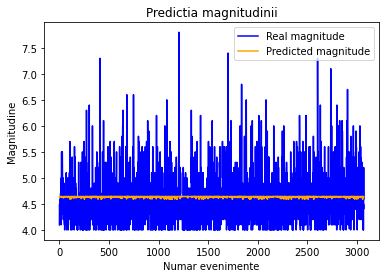

In [10]:
#Plot the test predictions
plt.plot(real, color = 'blue', label = 'Real magnitude')
plt.plot(pred, color = 'orange', label = 'Predicted magnitude')
plt.title('Predictia magnitudinii')
plt.xlabel('Numar evenimente')
plt.ylabel('Magnitudine')
plt.legend()
plt.show()